# QUESTIONS
What was your slope for 2.1 and 2.2b
What was your formula for 2.2a
Compare Machine Error Plots


# Project 2 Numerical Differentiation and Machine Error 

Throughout physics, we need to be able to take derivatives of both functions and of data. However, as we will see below this process can introduce large errors, so we need to procede carefully (much more carefully than for integration!)

## Learning objectives

After this lesson, you should be able to:
* Compute a numerical derivative using forward/backward differentiation
* Be able to use different stencils
* Compare two floating point numbers
* Evaluate and communicate the numerical error resulting from performing differentiation discretely

# Pre-class

Remind yourself of Taylor series, either through your calculus textbook and/or this [video](https://youtu.be/3d6DsjIBzJ4)

Read Sec 3.2 of TAK. You will probably find it helpful to read along using a paper/pencil, and/or be able to draw on your PDF.

# In-class

Today's class (1) requires that you carefully read and understand some mathematical derivations and (2) the in-class work is also the HW asignment (unlike usually...)

## Derivatives

Estimating the derivative of a function is a very common task in scientific computing. The need arises, for example, when 
we have data that represent some dependent variable $f$ as a function of an independent variable $x$, and we would like 
to know the rate at which $f$ changes. If the data are generated from a numerical code, or from an experiment, then $f$ is 
only known at discrete 
values of $x$ and we cannot differentiate $f(x)$ analytically. We must resort to numerical techniques. 

Numerical differentiation can be difficult to do well. We cannot apply the definition 

\label{derivativedef}
$$
f'(x)  = \lim_{h\to 0}\frac{f(x+h)-f(x)}{h} 
\tag{1}
$$

directly if the data are discrete, because we cannot take the limit $h\to 0$. Even in cases where we can evaluate the 
function everywhere, this expression for the derivative is prone to an error known as _subtractive cancellation_.  Subtractive cancellation occurs if you make $h$ very small, as the definition requires. 

Consider for example the function $f(x) = \cos(x)\tanh(x)$. You can verify that it's derivative at $x=2$ is

$$
	f'(2) = \cos(2){\rm sech}^2(2) - \sin(2)\tanh(2) \approx -0.905989
$$

However, if we use the definition (1) with $h = 10^{-16}$, the result in double precision is 

$$
	f'(2) = \frac{f(2+h) - f(2)}{h} = 0.0
$$

The answer is wrong because with double precision both $f(2+h)$ and $f(2)$ evaluate to $-0.40117702779274822$.  
With single precision, subtractive cancellation occurs for much larger values of $h$. 

## Why is this? How variables are stored.

Computer represent all numbers as strings of bits. For integers, this is straightforward:

    1 = 0001
    2 = 0010
    3 = 0011

etc. For floating point numbers (decimals), life is a little bit harder.  To get an idea of how this works, try out this interactive tool:

http://evanw.github.io/float-toy/


## Forward and Backward Difference Formulas


The definition (1) for the derivative $f'(x)$ requires us to evaluate the function 
at two points, namely, $x+h$ and $x$. We need to develop techniques to *approximate the derivative $f'(x)$ 
that do not require us to take the limit $h\to 0$. The approximations to $f'(x)$ are constructed from 
combinations of the function $f$ evaluated at various points surrounding $x$. We refer to these as *finite 
difference* formulas. 

Let's say we want to approximate $f'(x)$ using the 
values of $f$ at the points $x$ and $x+h$. That is, we want a formula that says 

\label{fprimeab}
```math
f'(x) \approx a f(x+h) + b f(x) 
\tag{2}
```

for some constants $a$ and $b$. We can determine $a$ and $b$ by using the Taylor series

```math
	f(x+h) = f(x) + f'(x) h + \frac{1}{2} f''(x) h^2 + \cdots
```

to expand the right--hand side of Eq.(2). This yields 

\label{afbfexpanded}
```math
	a f(x+h) + b f(x)  = (a+b)f(x) + a f'(x) h + \frac{a}{2} f''(x) h^2 + \cdots
\tag{3}
```

The right--hand side of this relation will equal $f'(x)$, approximately, if $a+b=0$ and $a=1/h$. (That is, $a=1/h$ and $b=-1/h$.) 
With these values for the constants, Eq.(2) yields 

\label{forwarddiffformula}
```math
	f'(x) \approx \frac{f(x+h) - f(x)}{h}
\tag{4}
```

This approximation to the first derivative is called the _forward difference_. It is simply the 
definition (1) without the limit $h \to 0$.

Let's look at this result a bit more closely. With $a=1/h$ and $b=-1/h$, Eq.(3)
becomes 

```math
	\frac{1}{h} f(x+h) - \frac{1}{h} f(x) = f'(x) + \frac{1}{2} f''(x) h + \cdots
```

Equivalently, we can write this as

\label{fdwitherr}
```math
	f'(x) = \frac{f(x+h) - f(x)}{h} - \frac{1}{2} f''(x) h + \cdots
\tag{5}
```

This shows that the error in the forward difference approximation (5) is

\label{EFexpression}
```math
	{\cal E}_F = \frac{1}{2} f''(x) h + \cdots
```

In particular, the leading term in ${\cal E}_F$ is proportional to $h$.

We can carry out a similar analysis to obtain a finite difference approximation to 
$f'(x)$ using the points $x-h$ and $x$. 
The result is the _backward difference_ approximation

\label{backwarddiffformula}
```math
	f'(x) \approx \frac{f(x) - f(x-h)}{h}
```

with error 
\label{EBexpression}
```math
	{\cal E}_B = -\frac{1}{2} f''(x) h + \cdots 
```

Again, the leading term in the error is proportional to $h$. 

## Exercise 1: 

Write a code to compute the forward and backward difference approximations to $f'(2.0)$, where 
$f(x) =  \cos(x)\tanh(x)$. Use $h = 10^{-1}, 10^{-2},\ldots,10^{-7}$. For both approximation methods, show that the errors ${\cal E}$ are 
proportional to $h$ in one of two ways:

1. Show that a log--log plot of ${\cal E}$ versus $h$ gives a straight 
line with slope $1$. 

2. If the error is proportional to $h$, then ${\cal E} = C h$ for some constant $C$. 
Let $h_1$ and $h_2$ denote your two smallest $h$ values, and ${\cal E}_1$ and ${\cal E}_2$ denote the corresponding 
errors. The relations ${\cal E}_1 = C h_1$ and ${\cal E}_2 = C h_2$ imply ${\cal E}_2/{\cal E}_1 = h_2/h_1$. If the 
ratio ${\cal E}_2/{\cal E}_1$ agrees (approximately) with the ratio $h_2/h_1$, then the errors are proportional to $h$.

**New command for today: numpy.zeros_like() -- it produces an array of zeros of the same shape as the one you give it.  So, for 1D arrays, it's equivalent to numpy.zeros(len(A)), where A is your reference array.**

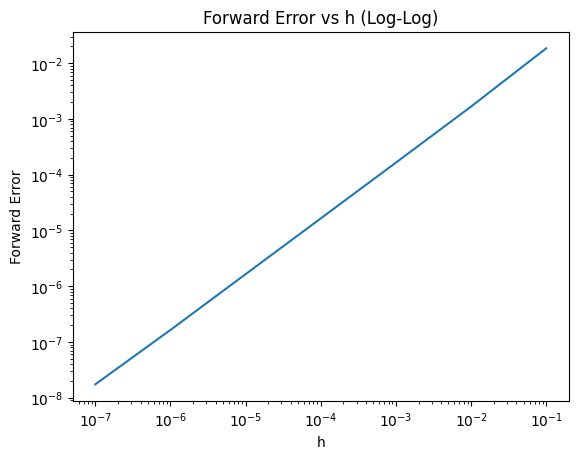

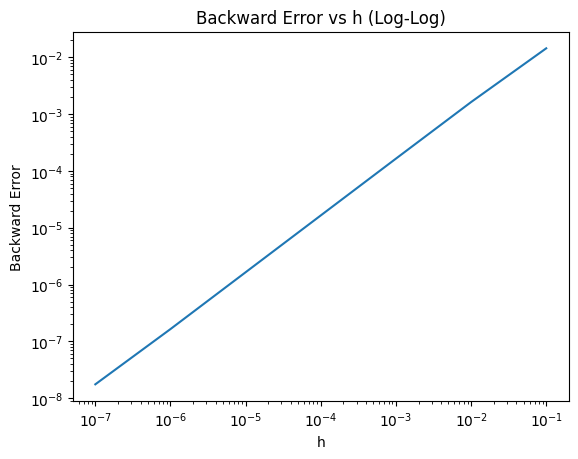

In [1]:
import numpy as np
import matplotlib.pyplot as plt

##################################
#   FUNCTIONS
##################################
def f(x):
    return np.cos(x) * np.tanh(x)

def f_prime(x): 
    return (-np.sin(x)*np.tanh(x)) + (np.cos(x)/(np.cosh(x)**2))


##################################
#   IMPORTANT VALUES
##################################
x_0 = 2.0                           ## Define the point to evaluate
exact_result = f_prime(x_0)
h_i = [0.1, 0.01, 0.001, 0.0001,    ## Define the h_i so we can loop over the different h's
       0.00001, 0.000001, 0.0000001]
fwd_err = [0, 0, 0, 0, 0, 0, 0]     ## Forwards error
bwd_err = [0, 0, 0, 0, 0, 0, 0]     ## Backwards error


##################################
#   FINDING THE VALUES
##################################
# Use a for loop to store all the approximations and errors
for i in range(len(h_i)):
    h = h_i[i]
    fwd_approx = (f(x_0 + h) - f(x_0)) / h
    bwd_approx = (f(x_0) - f(x_0 - h)) / h
    fwd_err[i] = abs(fwd_approx - exact_result)
    bwd_err[i] = abs(bwd_approx - exact_result)


##################################
#   LOG-LOG PLOTS
##################################
plt.figure()
plt.loglog(h_i, fwd_err)
plt.xlabel("h")
plt.ylabel("Forward Error")
plt.title("Forward Error vs h (Log-Log)")
plt.show()

plt.figure()
plt.loglog(h_i, bwd_err)
plt.xlabel("h")
plt.ylabel("Backward Error")
plt.title("Backward Error vs h (Log-Log)")
plt.show()


## Machine Error

What if we continued this approach of decreasing $h$ below $10^{-7}$ or so?  Try to calculate the derivative for smaller and smaller $h$.  Plot a log-log of the error just like above, but continue below $10^{-7}$ -- what happens?

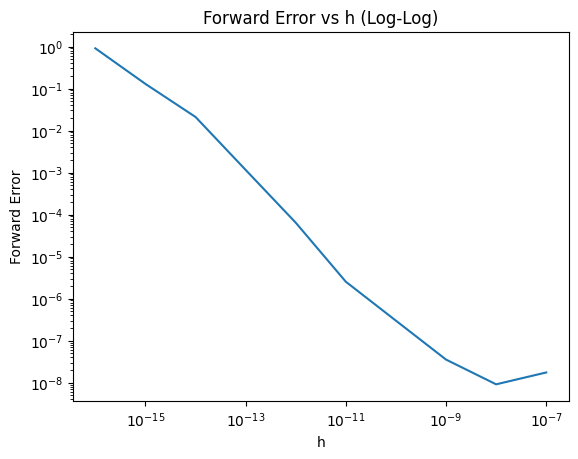

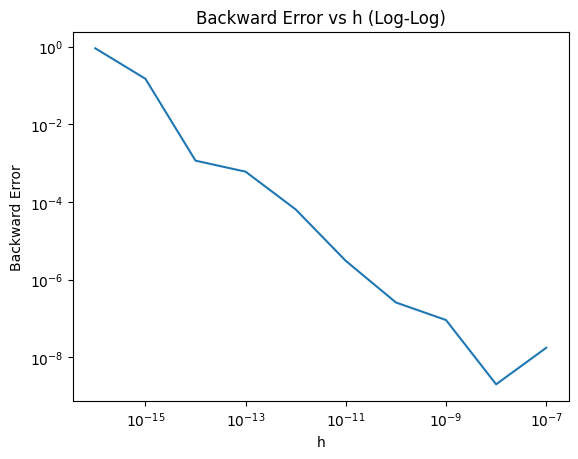

As h goes to 0 passed 10^-8, the round off error starts to dominate the error.


In [2]:
##################################
#   IMPORTANT VALUES
##################################
x_0 = 2.0                           ## Define the point to evaluate
exact_result = f_prime(x_0)
h_i = [1e-7, 1e-8, 1e-9, 1e-10, 1e-11,
       1e-12, 1e-13, 1e-14, 1e-15, 1e-16]
fwd_err = np.zeros(10)              ## Forwards error
bwd_err = np.zeros(10)              ## Backwards error


##################################
#   FINDING THE VALUES
##################################
# Use a for loop to store all the approximations and errors
for i in range(len(h_i)):
    h = h_i[i]
    fwd_approx = (f(x_0 + h) - f(x_0)) / h
    bwd_approx = (f(x_0) - f(x_0 - h)) / h
    fwd_err[i] = abs(fwd_approx - exact_result)
    bwd_err[i] = abs(bwd_approx - exact_result)


##################################
#   LOG-LOG PLOTS
##################################
plt.figure()
plt.loglog(h_i, fwd_err)
plt.xlabel("h")
plt.ylabel("Forward Error")
plt.title("Forward Error vs h (Log-Log)")
plt.show()

plt.figure()
plt.loglog(h_i, bwd_err)
plt.xlabel("h")
plt.ylabel("Backward Error")
plt.title("Backward Error vs h (Log-Log)")
plt.show()

print("As h goes to 0 passed 10^-8, the round off error starts to dominate the error.")

In [3]:
#Computers represent numbers in a binary floating point format with a fixed number of bits.  
#This means that you have some limitation in how many digits your computer can represent.
#For example, try the following:

print(0.1+0.2)
print(0.3)

0.30000000000000004
0.3


In [4]:
# This means that statements you *think* are true sometimes are not:
a = 0.1 + 0.2
b = 0.3

if a==b:
    print("a and b are the same!")
else:
    print("a and b are different")

a and b are different


In [5]:
# Aside from the numerical error you saw above in trying to use numbers h that are too small,
# the biggest place you'll have to pay attention is in comparisons such as the one above.  The correct
# way to do this is by comparing the absolute value of the difference to a small number: |a - b| < tolerance

a = 0.1 + 0.2
b = 0.3

if abs(a-b) < 1e-10:
    print("a and b are the same!")
else:
    print("a and b are different")

a and b are the same!


You can find some more reading on floating point error here:
* https://docs.python.org/3/tutorial/floatingpoint.html

## Central Difference Formula

Let's derive a finite difference approximation for $f'(x)$ using the _three_ points $x-h$, $x$ and $x+h$. 
That is, we seek a relation 

$$
	f'(x) \approx a f(x-h) + b f(x) + c f(x+h)
    \tag{8}
$$

for some constants $a$, $b$ and $c$. The constants are determined by expanding $f(x-h)$ and $f(x+h)$ in Taylor series

$$
\begin{aligned}
	f(x-h) & = f(x) - f'(x) h + \frac{1}{2} f''(x) h^2 - \frac{1}{6} f'''(x) h^3 + \cdots  \\
	f(x+h) & = f(x) + f'(x) h + \frac{1}{2} f''(x) h^2 + \frac{1}{6} f'''(x) h^3 + \cdots 
\end{aligned}
$$

and inserting these into the right--hand side of Eq. (8):

$$
\begin{aligned}
	a f(x-h) + b f(x) + c f(x+h) & =  (a + b + c)f(x) + (c-a)f'(x) h + \frac{1}{2}(c+a)f''(x) h^2 \ \\
	&  \quad + \frac{1}{6}(c-a)f'''(x) h^3 + \cdots
\end{aligned}
$$

This expression will equal $f'(x)$, approximately, if 

$$
(a+b+c) = 0, \\
(c-a) = 1/h, \\
(c+a) = 0. 
$$

That is, $a = -1/(2h)$, $b=0$, and $c=1/(2h)$. With these values for the constants, we have 

$$
	-\frac{1}{2h} f(x-h) + \frac{1}{2h} f(x+h) = f'(x) + \frac{1}{6} f'''(x) h^2 + \cdots
$$

This gives us the __central difference__ formula for the first derivative:

$$
	f'(x) \approx \frac{f(x+h) - f(x-h)}{2h} 
$$

The error for this method is 

$$
	{\cal E}_C = \frac{1}{6} f'''(x) h^2 + \cdots
$$

It is proportional to $h^2$. 

The central difference formula is simply the average of the forward and 
backward difference formulas. In taking the average, the order $h$ terms in the errors ${\cal E}_F$ and ${\cal E}_B$ 
cancel. The order $h^2$ terms, included in the $\cdots$ of Eqs.(6) and (7), do not 
cancel; rather, they combine to give the central difference error ${\cal E}_C$. 

## Homework 2.1

Numerically-compute the derivative of $f(x) = \cos(x)\tanh(x)$ at $x=2$ using the central difference method. Using a graph, show that the error ${\cal E}$ is proportional to $h^2$, by comparing to the value you know from calculus. 

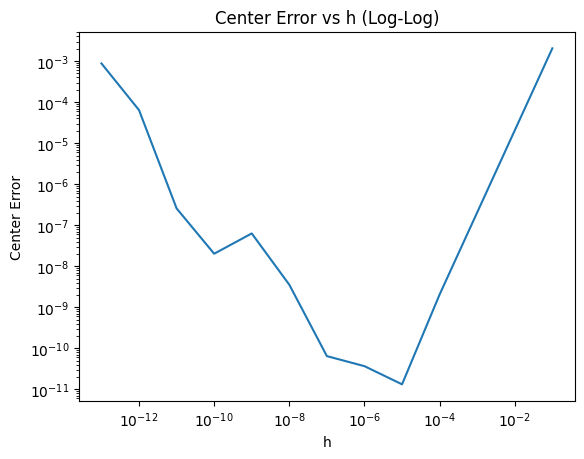

In the linear region, when the error is not affected by round off errors...
Estimated slope: 2.047539986094284

The approximate derivative at h = 10^-3: -0.9059887100072161
The actual derivative:			 -0.9059889152140197


In [6]:
##################################
#   IMPORTANT VALUES
##################################
h_i = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-7, 1e-8, 1e-9, 
       1e-10, 1e-11, 1e-12, 1e-13]
cen_err = np.zeros(13)          ## Central error
cen_approx = np.zeros(13)


##################################
#   FINDING THE VALUES
##################################
# Use a for loop to store all the approximations and errors
for i in range(len(h_i)):
    h = h_i[i]
    cen_approx[i] = (f(x_0 + h) - f(x_0 - h)) / (2*h)
    cen_err[i] = abs(cen_approx[i] - exact_result)


##################################
#   LOG-LOG PLOT
##################################
plt.figure()
plt.loglog(h_i, cen_err)
plt.xlabel("h")
plt.ylabel("Center Error")
plt.title("Center Error vs h (Log-Log)")
plt.show()


##################################
#   PROPORTIONALITY
##################################
# First, truncate so that we only use the linear region
h_i     = h_i[:5]           # https://stackoverflow.com/questions/4838504/how-do-i-truncate-a-list
cen_err = cen_err[:5]

# Then calculate the slope
log_h   = np.log(h_i)
log_err = np.log(cen_err)
m = (log_err[4] - log_err[0]) / (log_h[4] - log_h[0])

print("In the linear region, when the error is not affected by round off errors...\nEstimated slope:", m)
print("\nThe approximate derivative at h = 10^-3:", cen_approx[2])
print("The actual derivative:\t\t\t", exact_result)


Other stencils
--------------------
The pattern of evaluation points and coefficients is sometimes referred to as the "stencil". For example, the forward difference 
formulae might be called a one-sided, two-point stencil. The central difference formula 
is a centered, three-point stencil (although the coefficient of one of those points is zero). 

The method of the preceeding sections can be used to obtain other stencils for $f'(x)$. For example, we might 
want to calculate the derivative without any function evaluations at points less than $x$. For this we can choose 
a three-point stencil consisting of the points $x$, $x+h$ and $x+2h$. Using the Taylor series expressions 

$$
\begin{aligned}
	f(x+h) & = & f(x) + f'(x) h + \frac{1}{2} f''(x) h^2 + \frac{1}{6} f'''(x) h^3 + \cdots \\
	f(x+2h) & = & f(x) + 2 f'(x) h + \frac{4}{2} f''(x) h^2 + \frac{8}{6} f'''(x) h^3 + \cdots
\end{aligned}
$$

we have 

$$
\begin{aligned}
	a f(x) + b f(x+h) + c f(x+2h) & =   (a + b + c) f(x) + (b + 2c) f'(x) h \\
	 & + \frac{1}{2} (b + 4c) f''(x) h^2  + \frac{1}{6} (b + 8c) f'''(x) h^3 + \cdots
\end{aligned}
\tag{9}   
$$

This will approximate $f'(x)$ if the coefficients satisfy

$$
\begin{aligned}
(a + b + c) & = & 0 \\
	(b + 2c)h & = & 1 \\
	(b + 4c) & = & 0 
\end{aligned}
$$

The solution is $a = -3/(2h)$, $b = 2/h$, $c = -1/(2h)$. This yields the finite difference formula

$$
f'(x) \approx \frac{-3f(x) + 4f(x+h) - f(x+2h)}{2h}
\tag{10}
$$

The terms $(b+8c)f'''(x) h^3/6 + \cdots$ from Eq.(9), which are order $h^2$, do not vanish. Thus, the error 
for this one-sided, three-point stencil is proportional to $h^2$. 

You should write this out for yourselves on a whiteboard in class, so you can see how the steps work. Once you get to solving the system of 3 equations, consider trying Wolfram Alpha, using [this example](https://www.wolframalpha.com/input?i=solve+x+%2B+y+%3D+7+and+2x+%3D+12) as guidance.

In general, derivative formulas that use large stencils have higher order error. (That is, the error is a higher 
power of $h$.) However, derivative formulas with large stencils are more susceptible to subtractive cancellation errors.  Thus, a stencil with a very high order error is not necessarily better to use.

## Homework 2.2

First, make sure that you understand the three-point stencil derivation, above. If you get stuck on this problem, you can use the three-point stencil (first) and then come back later to update your answer to use a five-point stencil as a do-over.

a) Determine the five-point centered stencil for $f'(x)$: this stencil is like the three-point stencil in Eq. 10, but spans the points $x-2h$, $x-h$, $x$, $x+h$, $x+2h$. You may use Mathematica or Maple to solve for the constants yourself (excellent!), or ask for help to get them. Write your equations in a similar form to the three-point stencil above. 

b) Numerically-compute the derivative of $f(x) = \cos(x)\tanh(x)$ at $x=2$ using this five-point stencil. Using a graph, show that the error ${\cal E}$ is proportional to $h^4$, by comparing to the value you know from calculus. 


### Solution to part (a)
The approximation will be a weighted summation of the function evaluated at several points.
```math
f'(x) ≈ A f(x-2h) + B f(x-h) + C f(x) + D f(x+h) + E f(x+2h)
```

#### Taylor Expand Each Term
```math
\begin{aligned}
f(x-2h) &= f(x) - 2 h f'(x) + 2 h^2 f''(x) - \frac{4}{3} h^3 f'''(x) + \dots \\
f(x-h) &= f(x) - h f'(x) + \frac{h^2}{2} f''(x) - \frac{h^3}{6} f'''(x) + \dots \\
f(x) &= f(x) \\
f(x+h) &= f(x) + h f'(x) + \frac{h^2}{2} f''(x) + \frac{h^3}{6} f'''(x) + \dots \\
f(x+2h) &= f(x) + 2 h f'(x) + 2 h^2 f''(x) + \frac{4}{3} h^3 f'''(x) + \dots
\end{aligned}
```


#### Linear Combination

```math
\begin{aligned}
A f(x-2h) + B f(x-h) + C f(x) &+ D f(x+h) + E f(x+2h) \\
    = \,(A+B+C+D+E) f(x) &\,+\, (-2A-B+D+2E) h f'(x) \\
    \,+\, (2A+\frac{B}{2}+\frac{D}{2}+2E) &h^2 f''(x) 
    \,+\, (\frac{-4A}{3}+\frac{B}{6}+\frac{6}{2}+\frac{4E}{3}) h^3 f'''(x) 
    \,+\, \dots
\end{aligned}
```

#### System of Equations for Coefficients

The system of equations that the coefficients must satisfy are:

```math
\begin{aligned}
A + B + C + D + E &= 0 \\
-2A - B + D + 2E &= \frac{1}{h}  \\
2A + \frac{B}{2} + \frac{D}{2} + 2 E &= 0  \\
-\frac{4A}{3} - \frac{B}{6} + \frac{D}{6} + \frac{4E}{3} &= 0
\end{aligned}
```

Solving yields:

```math
A = \frac{1}{12h}, \quad B = -\frac{2}{3h}, \quad C = 0, \quad D = \frac{2}{3h}, \quad E = -\frac{1}{12h}
```

#### Finite Difference Formula

```math
\boxed{
f'(x) \approx \frac{f(x-2h) - 8 f(x-h) + 8 f(x+h) - f(x+2h)}{12 h}
}
```

### Solution to part (b)

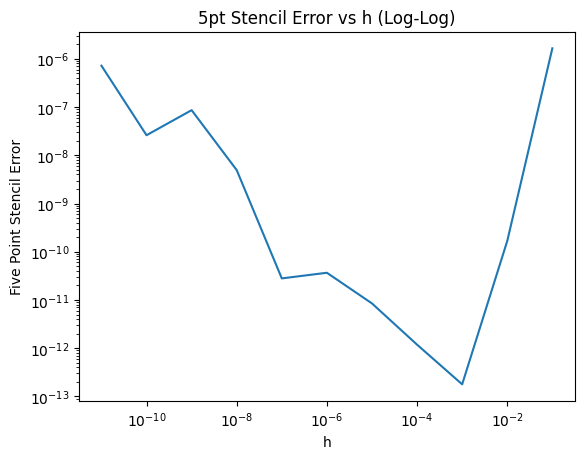

In the linear region, when the error is not affected by round off errors...
Estimated slope: 3.4825036266945415

The approximate derivative at h = 10^-3: -0.905988915213841
The actual derivative:			 -0.9059889152140197


In [ ]:
# b) Numerically-compute the derivative of f(x) = \cos(x)\tanh(x) at x=2 using this five-point stencil ("5pt" -> "Vpt").
#   Using a graph, show that the error is proportional to h^4, by comparing to the value you know from calculus. 

##################################
#   IMPORTANT VALUES
##################################
h_i = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6,
       1e-7, 1e-8, 1e-9, 1e-10, 1e-11]
five_pt_err = np.zeros(11)
five_pt_approx = np.zeros(11)

##################################
#   FINDING THE VALUES
##################################
# Use a for loop to store all the approximations and errors
for i in range(len(h_i)):
    h = h_i[i]
    five_pt_approx[i] = (      ## Implement the formula found in part (a)
        f(x_0 - 2*h) - 8*f(x_0 - h) +
        8*f(x_0 + h) - f(x_0 + 2*h) 
    ) / (12*h)
    
    five_pt_err[i] = abs(five_pt_approx[i] - exact_result)


##################################
#   LOG-LOG PLOTS
##################################
# BTW, we should see some linear region with m = ~4
plt.figure()
plt.loglog(h_i, five_pt_err)
plt.xlabel("h")
plt.ylabel("Five Point Stencil Error")
plt.title("5pt Stencil Error vs h (Log-Log)")
plt.show()


##################################
#   PROPORTIONALITY
##################################
# First, truncate so that we only use the linear region
h_i     = h_i[:3]    
cen_err = cen_err[:3]

# Then calculate the slope
log_h   = np.log(h_i)
log_err = np.log(five_pt_err)
m = (log_err[2] - log_err[0]) / (log_h[2] - log_h[0])

print("In the linear region, when the error is not affected by round off errors...\nEstimated slope:", m)
print("\nThe approximate derivative at h = 10^-3:", five_pt_approx[2])
print("The actual derivative:\t\t\t", exact_result)


## Second derivatives

We can apply the same technique to derive finite difference stencils for second derivatives, $f''(x)$, as well as higher order 
derivatives. For example, consider the three-point centered stencil for $f''(x)$. We can derive this stencil by
examining the Taylor expansion:


$$
\begin{aligned}
	a f(x-h) + b f(x) + c f(x+h) & =  (a + b + c)f(x) + (c-a)f'(x) h + \frac{1}{2}(c+a)f''(x) h^2  \\
	&  \quad + \frac{1}{6}(c-a)f'''(x) h^3 + \cdots
\end{aligned}
    \tag{11}
$$

The right-hand side will approximate $f''(x)$ if $(a+b+c)=0$, $(c-a)=0$ and $(c+a) h^2/2 = 1$. This gives 
$a = 1/h^2$, $b = -2/h^2$ and $c = 1/h^2$, so that

$$
	\frac{1}{h^2} f(x-h) - \frac{2}{h^2} f(x) + \frac{1}{h^2} f(x+h) = f''(x) + \cdots
$$

Thus, the centered three-point stencil for the second derivative is 

$$
	f''(x) \approx \frac{f(x+h) - 2f(x) + f(x-h)}{h^2}
    \tag{12}
$$

Note that the term $(c-a)f'''(x) h^3/6$ in Eq.(11) vanishes for the chosen values of 
$a$, $b$ and $c$. The next order term in Eq.(11) is proportional to $(c+a) f''''(x) h^4$. This term does not vanish and is proportional to $h^2$. Thus, the error for the formula (12) is of order $h^2$. 



## Homework 2.3: 

a) Numerically-compute the second derivative of $f(x) = \ln(x)/\cosh(x)$ for $2.0 \le x \le 5.0$, using the three-point centered stencil (Eq. 12). Plot a graph of $f''(x)$ over this range. 

b) Consider this graph: what features (limits? max? min? other comparisons?) can you explain using mathematics, that give you confidence in your result?


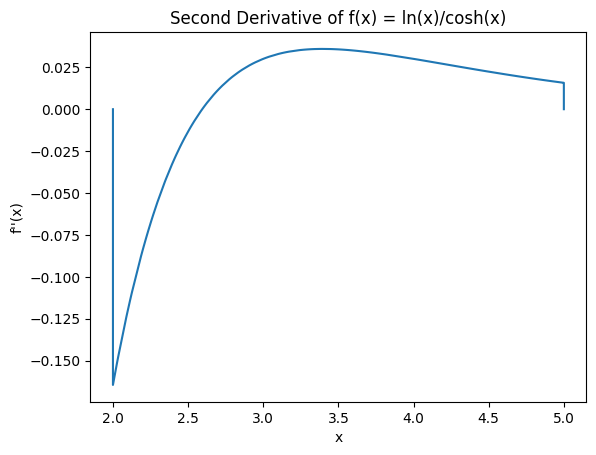

In [8]:
##################################
#   FUNCTION
##################################
def f(x):
    return np.log(x) / np.cosh(x)


##################################
#   IMPORTANT VALUES
##################################
a = 2.0
b = 5.0
h = 1e-5
x_pts = np.arange(a, b, h)
f_pts = f(x_pts)                    # I also want to plot the function so I can talk about it
f_2d_pts = np.zeros(len(x_pts))


##################################
#   FINDING THE VALUES
##################################
# Use a for loop to store all the approximations and errors
for i in range(1, len(x_pts) - 1):  # Dont want to start or stop on an endpoint... So i clipped those off
    f_2d_pts[i] = (
        f(x_pts[i-1]) - 2*f(x_pts[i]) + f(x_pts[i+1])
    ) / (h**2)


##################################
#   PLOT
##################################
plt.figure()
#plt.plot(x_pts, f_pts, label="f(x)")
plt.plot(x_pts, f_2d_pts, label="f ''(x)")
plt.xlabel("x")
plt.ylabel("f''(x)")
plt.title("Second Derivative of f(x) = ln(x)/cosh(x)")
#plt.legend()
plt.show()


### Answer for 2.3 b)

The graph is what I would expect for several reasons
1. The graph of f(x) dies out as $x$ grows to infinity, therefore the derivative and second derivative should also die out and approach 0
2. The concavity (second derivative) appears to match that of the graph of f(x). It switches from concave to convex around x=3.
3. The rate at which the slope of f(x) changes is low - a smooth curve, therefore the second derivative would also be somewhat smooth and low values
   


# Project 2

The problems listed here are the entirety of Project 2, and will be turned in as a ipynb on GitHub.